# ZAD 1


Proszę pobrać plik medicine.txt, zawierający wyniki analizy nowego leku. W dwóch pierwszych kolumnach znajduje się stężenie dwóch składników w próbce krwi, w trzeciej - informacja o tym, czy lek zadziałał. Dane nie są znormalizowane. Proszę znormalizować dane, podzielić je na zbiór uczący i testujący w proporcjach 80-20 (należy pamiętać o proporcjach klas), zaproponować wielowarstwową sieć neuronową i zbadać jej skuteczność dla różnych ilości warstw i neuronów w tych warstwach. Proszę narysować w jaki sposób sieć dokonała podziału w zbiorze dla kilku sieci (zarówno tych z dobrymi, jak i złymi wynikami) oraz jak wygląda poprawny podział zbioru. Proszę również przedstawić wyniki dla 5-8 różnych struktur sieci, wraz z oceną, która z nich najlepiej poradziła sobie z zadaniem klasyfikacji.

In [45]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lab02/medicine.txt')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Presence 1,Presence 2,Was medicine effective?
0,0.04609,6010.05,0
1,0.02237,6119.66,0
2,0.05054,7037.36,0
3,0.03155,5009.20,0
4,0.02256,6214.69,0
...,...,...,...
1345,0.08100,9901.00,0
1346,29.17000,1388.43,1
1347,37.19000,6542.10,1
1348,4.53300,22032.93,1


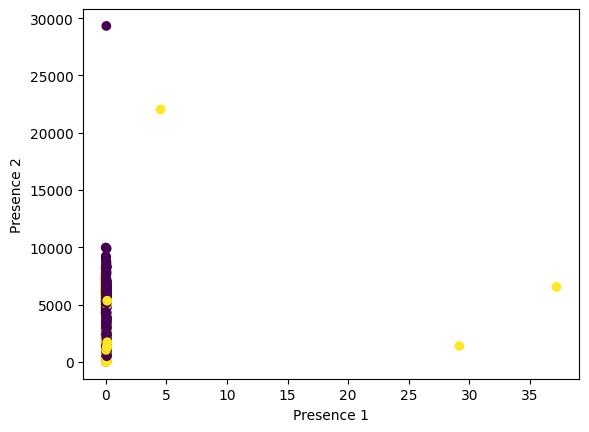

In [46]:
from seaborn import pairplot
import matplotlib.pyplot as plt
plt.scatter(df['Presence 1'],df['Presence 2'],c=df['Was medicine effective?'])
plt.xlabel('Presence 1')
plt.ylabel('Presence 2')
plt.show()                  # na wykresie widoczne pojedyncze, mocno odstające od reszty outliery

## Usuwanie outlierow metodą 3-sigma

In [47]:
import numpy as np

for string in ['Presence 1','Presence 2']:
  mean = np.mean(df[string])
  std_dev = np.std(df[string])
  lower_bound = mean - 3*std_dev
  upper_bound = mean + 3*std_dev
  df = df[(df[string] >= lower_bound) & (df[string] <= upper_bound)]      # dwuwymiarowo odrzucone
  print(string+' : ' +f'{mean = }; {std_dev = }')

Presence 1 : mean = np.float64(0.08618521481481484); std_dev = 1.2901956473042682
Presence 2 : mean = np.float64(4062.8147141796585); std_dev = 2408.5723835442573


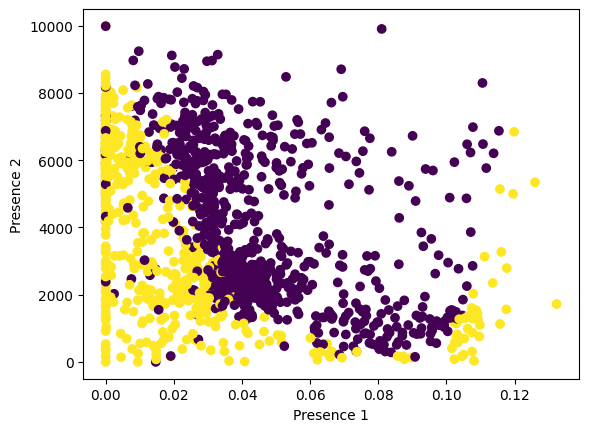

In [48]:
plt.scatter(df['Presence 1'],df['Presence 2'],c=df['Was medicine effective?'])
plt.xlabel('Presence 1')
plt.ylabel('Presence 2')
plt.show()

## Normalizacja

In [49]:
df.describe()

,Presence 1,Presence 2,Was medicine effective?
count,1346.000000,1346.000000,1346.000000
mean,0.033733,4044.049131,0.433135
std,0.029578,2309.794890,0.495693
min,0.000000,0.000000,0.000000
25%,0.009423,2021.677500,0.000000
50%,0.029455,3854.450000,0.000000
75%,0.046207,6108.837500,1.000000
max,0.132340,9990.380000,1.000000


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df.loc[:,'Presence 1':'Presence 2'])
pd.DataFrame(X, columns = df.columns[:2]).describe()

,Presence 1,Presence 2
count,1.346000e+03,1346.000000
mean,-1.266941e-16,0.000000
std,1.000372e+00,1.000372
min,-1.140905e+00,-1.751477
25%,-8.222211e-01,-0.875889
50%,-1.446894e-01,-0.082115
75%,4.219073e-01,0.894259
max,3.335048e+00,2.575355


Dane zostaly ustanadaryzowane, mamy średnia ok. 0 i odchylenie ok. 1

## Klasyfikacja

hidden_layers: (1, 1)
training score: 0.587360594795539
Dokładność: 0.5926
Precyzja: 0.6849
Czułość: 0.5926
Miara F1: 0.4763


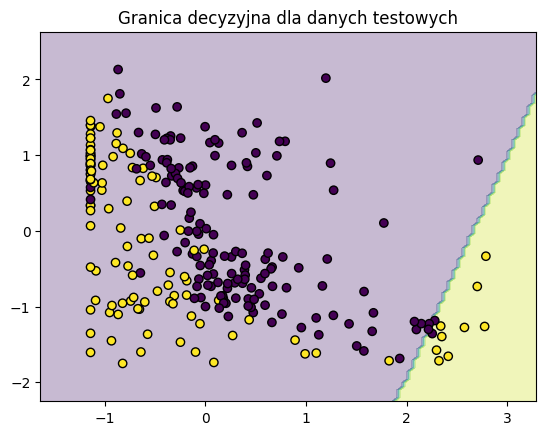

--------------------------------------------------
hidden_layers: (5, 5)
training score: 0.9005576208178439
Dokładność: 0.8926
Precyzja: 0.8937
Czułość: 0.8926
Miara F1: 0.8928


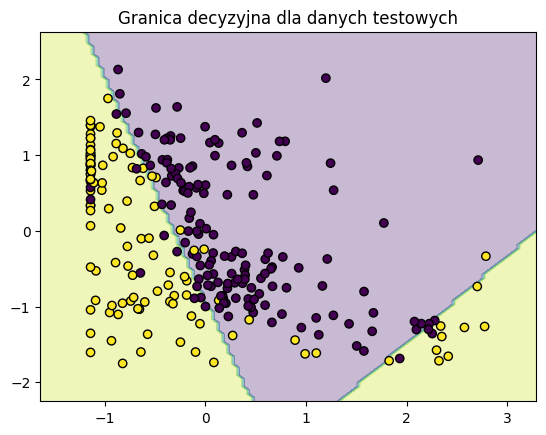

--------------------------------------------------
hidden_layers: (10, 10)
training score: 0.9191449814126395
Dokładność: 0.9111
Precyzja: 0.9133
Czułość: 0.9111
Miara F1: 0.9114


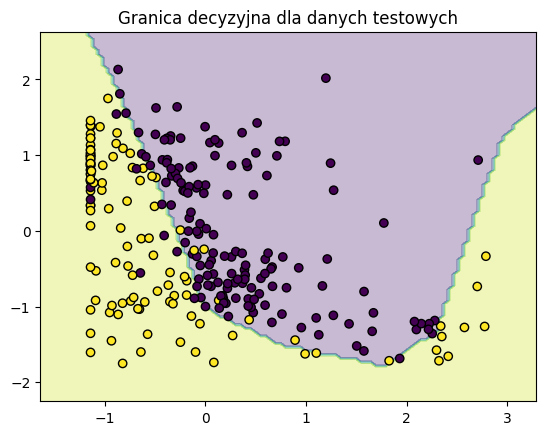

--------------------------------------------------
hidden_layers: (20, 20)
training score: 0.9219330855018587
Dokładność: 0.9111
Precyzja: 0.9133
Czułość: 0.9111
Miara F1: 0.9114


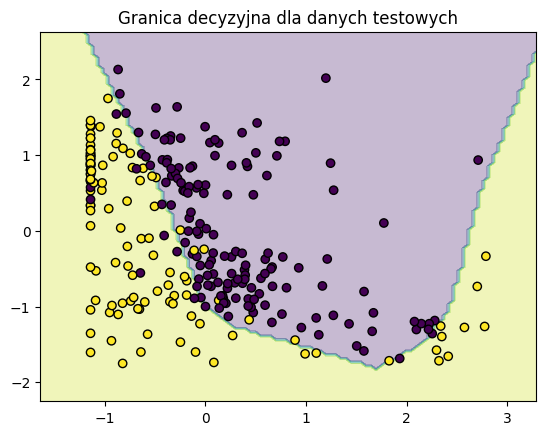

--------------------------------------------------
hidden_layers: (1, 1, 1, 1)
training score: 0.5669144981412639
Dokładność: 0.5667
Precyzja: 0.3211
Czułość: 0.5667
Miara F1: 0.4099


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


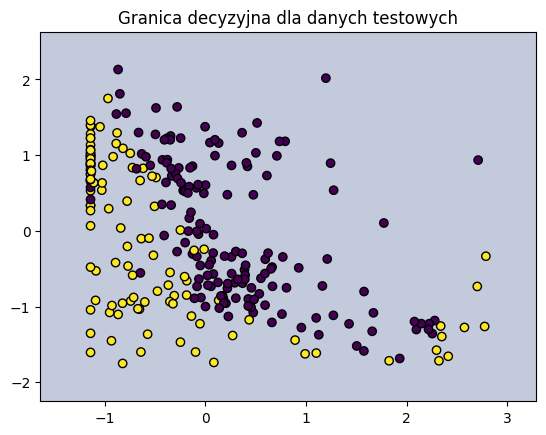

--------------------------------------------------
hidden_layers: (5, 5, 5, 5)
training score: 0.9182156133828996
Dokładność: 0.9111
Precyzja: 0.9143
Czułość: 0.9111
Miara F1: 0.9114


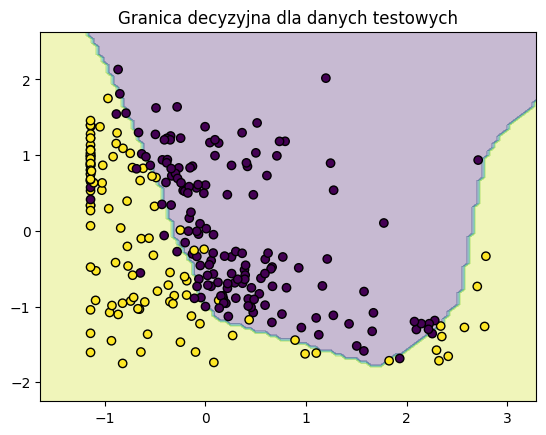

--------------------------------------------------
hidden_layers: (10, 10, 10, 10)
training score: 0.9247211895910781
Dokładność: 0.9333
Precyzja: 0.9340
Czułość: 0.9333
Miara F1: 0.9335


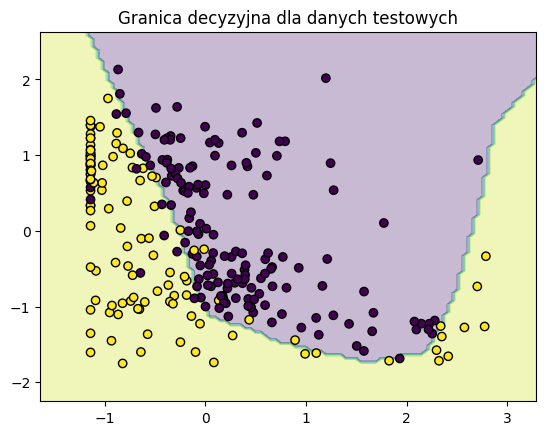

--------------------------------------------------
hidden_layers: (20, 20, 20, 20)
training score: 0.929368029739777
Dokładność: 0.9370
Precyzja: 0.9374
Czułość: 0.9370
Miara F1: 0.9371


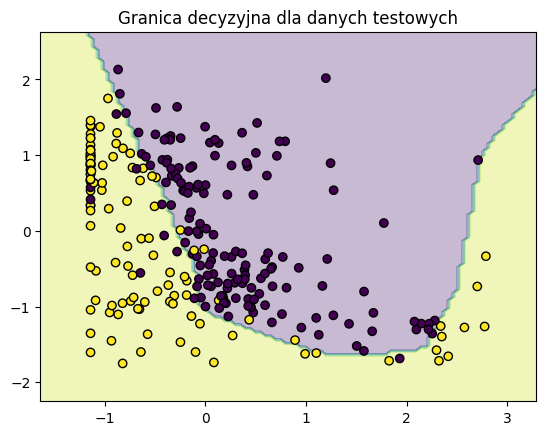

--------------------------------------------------


In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score

Y = df['Was medicine effective?']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8, stratify = Y)  # używamy atrybutu stratify, aby proporcje klas się zgadzały w oby podzbiorach(uczacym oraz testujacym)

def plot_decision_boundary(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')


for layers in [2,4]:
  for neurons in [1,5,10,20]:
    print(f'hidden_layers: {tuple(neurons for _ in range(layers))}')
    model = MLPClassifier(hidden_layer_sizes = tuple(neurons for _ in range(layers)), max_iter=2000)
    model.fit(X_train, Y_train)
    print('training score:', model.score(X_train,Y_train))

    predicted_labels_test=model.predict(X_test)

    accuracy = accuracy_score(Y_test, predicted_labels_test)  # Dokładność
    precision = precision_score(Y_test, predicted_labels_test, average='weighted')  # Precyzja
    recall = recall_score(Y_test, predicted_labels_test, average='weighted')  # Czułość (ang. recall)
    f1 = f1_score(Y_test, predicted_labels_test, average='weighted')  # Miara F1
    print(f"Dokładność: {accuracy:.4f}")
    print(f"Precyzja: {precision:.4f}")
    print(f"Czułość: {recall:.4f}")
    print(f"Miara F1: {f1:.4f}")

    fig, ax = plt.subplots()
    plot_decision_boundary(model, X_test, Y_test, ax)
    ax.set_title("Granica decyzyjna dla danych testowych")
    plt.show()
    print('-'*50)


## Wnioski
Zwiększanie liczby neuronów w warstwach ukrytych prowadzi do poprawy dopasowania modelu do danych treningowych.  Wpływ zwiększania liczby samych warstw ukrytych na jakość klasyfikacji jest natomiast mniej wyraźny. Tj. dla sieci o dwóch warstwach ukrytych, zawierających co najmniej 10 neuronów w każdej warstwie, zaobserwowano zbliżoną wartość 'training_score' (ok. 92%) jak dla sieci o czterech warstwach ukrytych z co najmniej 10 neuronami w każdej warstwie.  

Analiza wartości miary F1 wskazuje, że sieci neuronowe o zbyt małej liczbie neuronów w warstwach ukrytych, niezależnie od ich liczby, osiągają niską skuteczność klasyfikacji. Dla takich konfiguracji, czyli sieci: (1,1) oraz (1,1,1,1), miara F1 wynosi jedynie ok. 40%.

# ZAD 2
Proszę pobrać zbiór ręcznie pisanych cyfr z https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits (można to zrobić funkcją datasets.load_digits() w sklearnie). Proszę sprawdzić skuteczność klasyfikacji na tym zbiorze za pomocą wielowarstwowej sieci neuronowej.

## Przykladowe liczby ze zbioru danych:

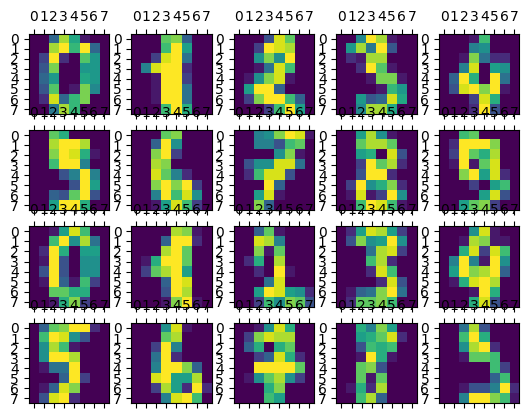

In [52]:
from sklearn.datasets import load_digits
digits = load_digits()

figure, axis = plt.subplots(4, 5)
for i in range(4):
  for j in range(5):
    axis[i,j].matshow(digits.images[i*5+j])
plt.show()

In [53]:
df = pd.DataFrame(digits.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [54]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


## Outlinery i normalizacja
Po próbach usunięcia outlinerów ze zbioru danych za pomocą obu metod identyfikacji outlinerów (3-sigma oraz Tukeya), zaobserwowałam, że jest to zjawisko niekorzystne ze względu na znaczące zmniejszanie rozmiaru zbioru danych. Taka redukcja danych mogłaby prowadzić do utraty cennych informacji, ponieważ outliery w tym zbiorze wydają się reprezentować rzeczywistę zmienność ręcznie pisanych cyfr, a nie błędy pomiarowe.  

Do normalizacji danych, użyłam standaryzacji.

In [55]:
scaler = StandardScaler()
X = scaler.fit_transform(digits.data)
pd.DataFrame(X, columns = digits.feature_names).describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1797.000000,1.797000e+03,1.797000e+03,1.797000e+03,...,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03
mean,0.0,-6.326480e-17,7.908099e-17,3.163240e-17,-5.535670e-17,-5.535670e-17,0.000000,1.581620e-17,-2.767835e-17,2.372430e-17,...,-7.908099e-18,2.372430e-17,-1.186215e-17,-3.954050e-17,-6.326480e-17,-1.818863e-16,4.349455e-17,4.942562e-17,9.885124e-17,1.581620e-17
std,0.0,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278,1.000278e+00,1.000278e+00,1.000278e+00,...,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00
min,0.0,-3.350165e-01,-1.094937e+00,-2.786437e+00,-2.764242e+00,-1.020657e+00,-0.409724,-1.250229e-01,-5.907756e-02,-6.240093e-01,...,-7.574358e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-1.089383e+00,-2.764171e+00,-2.394110e+00,-1.146647e+00,-5.056698e-01,-1.960075e-01
25%,0.0,-3.350165e-01,-8.845657e-01,-4.321998e-01,-4.311703e-01,-1.020657e+00,-0.409724,-1.250229e-01,-5.907756e-02,-6.240093e-01,...,-7.574358e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-8.933661e-01,-2.490095e-01,-3.667712e-01,-1.146647e+00,-5.056698e-01,-1.960075e-01
50%,0.0,-3.350165e-01,-2.534522e-01,2.740715e-01,2.687512e-01,-3.145470e-01,-0.409724,-1.250229e-01,-5.907756e-02,-6.240093e-01,...,-5.541027e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-3.053152e-01,2.082926e-01,4.441644e-01,-1.295226e-01,-5.056698e-01,-1.960075e-01
75%,0.0,-3.350165e-01,7.984036e-01,7.449191e-01,7.353655e-01,9.211453e-01,-0.409724,-1.250229e-01,-5.907756e-02,3.148782e-01,...,6.658963e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,8.707865e-01,8.942457e-01,8.496321e-01,8.876023e-01,-1.660165e-02,-1.960075e-01
max,0.0,8.485857e+00,2.271002e+00,9.803428e-01,9.686727e-01,1.803783e+00,4.402524,1.433847e+01,2.117340e+01,4.383391e+00,...,2.495895e+00,1.299989e+01,4.237924e+01,9.336462e+00,2.046888e+00,8.942457e-01,8.496321e-01,1.565686e+00,3.406875e+00,8.407974e+00


## Skuteczność klasyfikacji za pomocą przykładowej sieci wielowarstwowej

training score: 0.9993041057759221
test accuracy: 0.9472


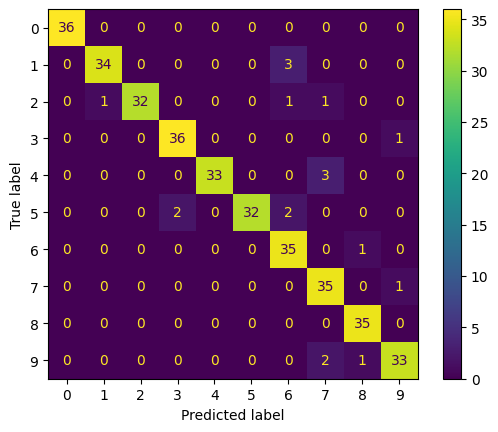

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, stratify = Y)
model = MLPClassifier(hidden_layer_sizes = (10,10), max_iter=500,tol=1e-4)
model.fit(X_train, Y_train)
print('training score:', model.score(X_train,Y_train))

predicted_labels_test=model.predict(X_test)
cm=confusion_matrix(Y_test, predicted_labels_test)
ConfusionMatrixDisplay(cm).plot()


accuracy = np.trace(cm) / np.sum(cm)
print(f'test accuracy: {accuracy:.4f}')

## Wnioski
Przykładowa sieć neuronowa ma skuteczność na wysokim poziomie. Myli pojedyncze cyfry.

# ZAD 3
Proszę sprawdzić, jak zmieni się poprawność klasyfikacji na zbiorze ręcznie pisanych cyfr dla różnych architektur sieci, funkcji aktywacji, ilości epok uczenia i algorytmów uczenia. Proszę zbadać wpływ współczynnika uczenia (learning_rate) podczas używania algorytmu SGD. Dla najciekawszych przykładów proszę wypisać macierze pomyłek oraz wyliczyć wszystkie poznane metryki.

## Architekruty sieci

architecture=(10,) : 0.9640979422495654
architecture=(10, 10) : 0.9471735011981186
architecture=(10, 10, 10) : 0.9498977983343678
architecture=(5,) : 0.920010924788988
architecture=(5, 5) : 0.8774492895831753
architecture=(5, 5, 5) : 0.9109824350961125
architecture=(20,) : 0.9694652690638396
architecture=(20, 20) : 0.9639123186830155
architecture=(20, 20, 20) : 0.9667702732914
architecture=(10, 5) : 0.9245436792490161
architecture=(5, 10) : 0.889261949667056
architecture=(20, 5) : 0.9473351073195205
architecture=(5, 20) : 0.9034072224339309
architecture=(20, 10, 5) : 0.9530309842655817
architecture=(20, 5, 10) : 0.9276610177338596
architecture=(5, 10, 20) : 0.878181375335614


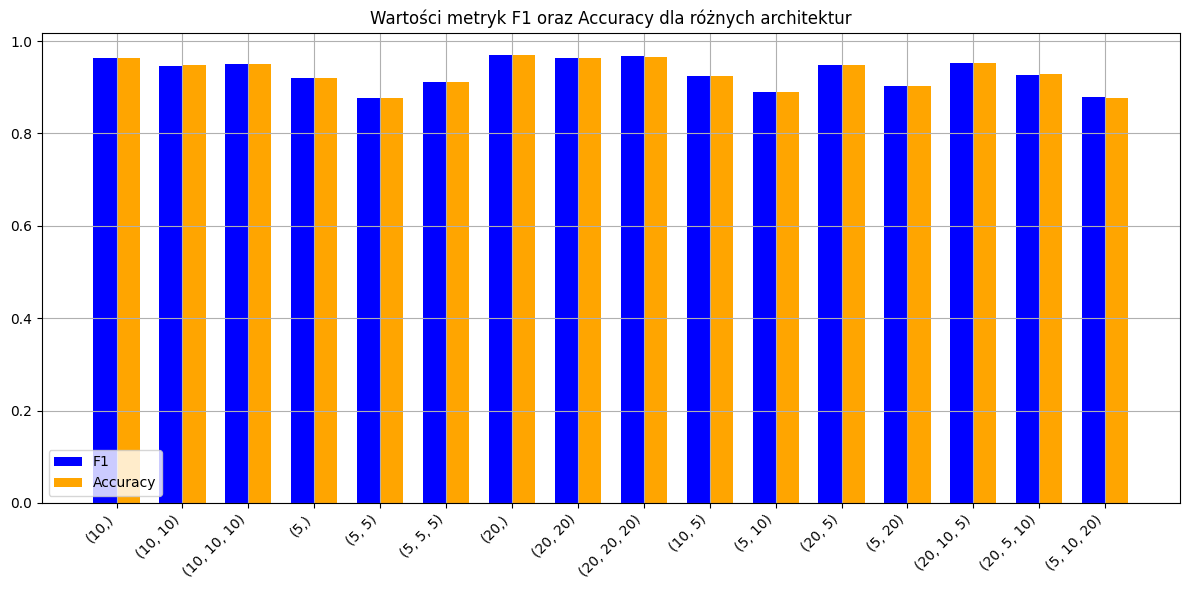

In [57]:
architectures = [
    (10,),
    (10,10),
    (10,10,10),
    (5,),
    (5,5),
    (5,5,5),
    (20,),
    (20,20),
    (20,20,20),
    (10,5),
    (5,10),
    (20,5),
    (5,20),
    (20,10,5),
    (20,5,10),
    (5,10,20)
]
accuracies = []
F1s = []

for architecture in architectures:
    model = MLPClassifier(hidden_layer_sizes = architecture, max_iter=2000)
    model.fit(X_train, Y_train)
    predicted_labels_test=model.predict(X_test)
    accuracies.append(model.score(X_test,Y_test))
    F1s.append(f1_score(Y_test, predicted_labels_test, average='weighted'))
    print(f'{architecture=} : {F1s[-1]}')

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
f1_positions = np.arange(len(architectures))
acc_positions = f1_positions + bar_width

ax.bar(f1_positions, F1s, bar_width, label='F1', color='blue')
ax.bar(acc_positions, accuracies, bar_width, label='Accuracy', color='orange')

ax.set_xticks(f1_positions + bar_width / 2)
ax.set_xticklabels(architectures, rotation=45, ha='right')
ax.set_title('Wartości metryk F1 oraz Accuracy dla różnych architektur')
ax.grid()
ax.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

## Wnioski
Najwyższe wartości dokładności i miary F1 osiągnięto dla sieci o największej liczbie neuronów, a konkretnie dla architektur z (20, 20) oraz (20, 20, 20) warstwami ukrytymi.

Co więcej, wyniki wskazują, że dla architektur z taką samą liczbą neuronów w każdej warstwie, zwiększenie głębokości (liczby warstw) niekoniecznie prowadzi do lepszych wyników. W rzeczywistości, pierwsze dziewięć testowanych architektur, które miały jednolitą liczbę neuronów na warstwę, wykazały tendencję spadkową dokładności i miary F1 wraz ze wzrostem liczby warstw.

Dodatkowo możemy zauważyć schemat, który pokazuje, że jeżeli do warstwy z określoną ilością neuronów, dodamy drugą wartwę o mniejszej ilości neuronów, wynik będzie lepszy, niż gdybyśmy skonfigurowali sieć na odwrót. Na przykład, architektura (20, 5) osiągnęła wyższy wynik niż architektura (5, 20).

Duże znaczenie wydaje się mieć pierwsza warstwa modelu, która, gdy zawiera małą liczbę neuronów, to niezależnie od głębokości sieci, daje wyniki porównywalnie małe. Dla tego typu sieci (5,10,20) wypiszę dodatkowe dane:

Dokładność: 0.8889
Precyzja: 0.8926
Czułość: 0.8889
Miara F1: 0.8895


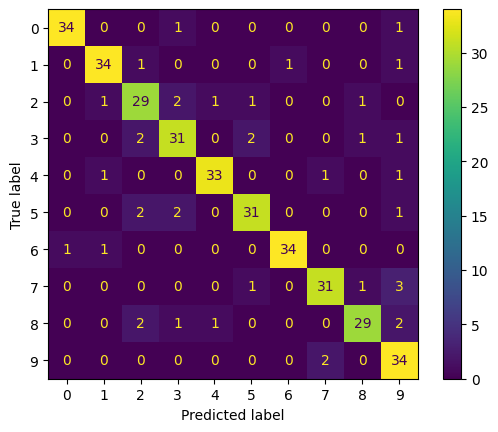

In [58]:
model = MLPClassifier(hidden_layer_sizes = (5,10,20), max_iter=2000)
model.fit(X_train, Y_train)
predicted_labels_test=model.predict(X_test)
CM = ConfusionMatrixDisplay(confusion_matrix(Y_test, predicted_labels_test))
CM.plot()
print(f"Dokładność: {accuracy_score(Y_test, predicted_labels_test):.4f}")
print(f"Precyzja: {precision_score(Y_test, predicted_labels_test, average='weighted') :.4f}")
print(f"Czułość: {recall_score(Y_test, predicted_labels_test, average='weighted'):.4f}")
print(f"Miara F1: {f1_score(Y_test, predicted_labels_test, average='weighted'):.4f}")


Widzimy, że ten model, często myli cyfrę 8 (jest to problem symetryczny).

## Funkcje aktywacji

In [59]:
activation_functions = ['identity', 'logistic', 'tanh', 'relu']
results = {}

for af in activation_functions:
  results[af] = {
        'accuracy': [],
        'f1': []
        }
  for i in range(3):
    model = MLPClassifier(hidden_layer_sizes = (10,10), max_iter=2000, activation = af)
    model.fit(X_train, Y_train)
    predicted_labels_test=model.predict(X_test)
    results[af]['accuracy'].append(accuracy_score(Y_test, predicted_labels_test))
    results[af]['f1'].append(f1_score(Y_test, predicted_labels_test, average='weighted'))

  mean_accuracy = np.mean(results[af]['accuracy'])
  mean_f1 = np.mean(results[af]['f1'])
  print(f'{af=}: Accuracy = {mean_accuracy:.4f}, F1 = {mean_f1:.4f}')

af='identity': Accuracy = 0.9546, F1 = 0.9547
af='logistic': Accuracy = 0.9222, F1 = 0.9221
af='tanh': Accuracy = 0.9463, F1 = 0.9463
af='relu': Accuracy = 0.9657, F1 = 0.9658


## Wnioski
Analiza wyników klasyfikacji dla sieci o architekturze (10,10) z wykorzystaniem różnych funkcji aktywacji wskazuje, że funkcja 'identity' oraz domyślna funkcja 'relu' osiągają najlepsze rezultaty. Z kolei funkcja 'logistic' charakteryzuje się najniższą skutecznością dla tej architektury. Sprawdzę jak wyglądają rozszerzone dane dla tej funkcji aktywacji:

Dokładność: 0.9361
Precyzja: 0.9369
Czułość: 0.9361
Miara F1: 0.9362


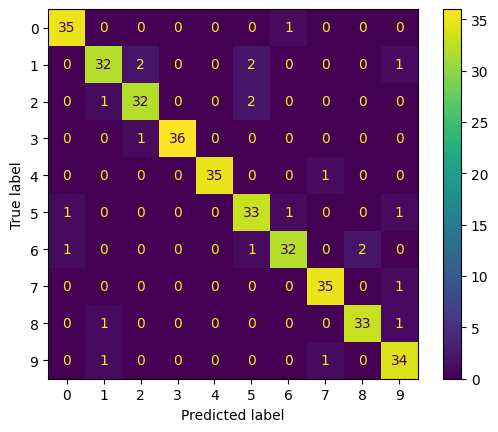

In [60]:
model = MLPClassifier(hidden_layer_sizes = (10,10), max_iter=2000, activation = 'logistic')
model.fit(X_train, Y_train)
predicted_labels_test=model.predict(X_test)
CM = ConfusionMatrixDisplay(confusion_matrix(Y_test, predicted_labels_test))
CM.plot()
print(f"Dokładność: {accuracy_score(Y_test, predicted_labels_test):.4f}")
print(f"Precyzja: {precision_score(Y_test, predicted_labels_test, average='weighted') :.4f}")
print(f"Czułość: {recall_score(Y_test, predicted_labels_test, average='weighted'):.4f}")
print(f"Miara F1: {f1_score(Y_test, predicted_labels_test, average='weighted'):.4f}")

W przypadku sieci o najniższej skuteczności, wykorzystującej funkcję aktywacji 'logistic', znowu zaobserwowałam najczęstsze błędy w rozpoznawaniu cyfry 8.

## Ilość epok uczenia

In [61]:
epochs = [10,20,50,100,200,500,1000,2000]

for epoch in epochs:
  model = MLPClassifier(hidden_layer_sizes = (10,10), max_iter=epoch)
  model.fit(X_train, Y_train)
  predicted_labels_test=model.predict(X_test)
  acc = accuracy_score(Y_test,predicted_labels_test)
  f1 = f1_score(Y_test,predicted_labels_test,average='weighted')
  print(f'{epoch=}: accuracy = {acc:.4f} , F1 = {f1:.4f}')

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


epoch=10: accuracy = 0.1694 , F1 = 0.0656
epoch=20: accuracy = 0.5917 , F1 = 0.4929


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


epoch=50: accuracy = 0.8833 , F1 = 0.8813


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


epoch=100: accuracy = 0.9306 , F1 = 0.9304


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


epoch=200: accuracy = 0.9611 , F1 = 0.9611
epoch=500: accuracy = 0.9583 , F1 = 0.9587
epoch=1000: accuracy = 0.9611 , F1 = 0.9612
epoch=2000: accuracy = 0.9417 , F1 = 0.9417


## Wnioski
Dla liczby epok wynoszącej 50 i 100, sieć neuronowa osiąga zadowalające rezultaty klasyfikacji. Dalsze zwiększanie liczby epok, powyżej 100, nie prowadzi do istotnej poprawy wyników. Rozszerzone dane dla sieci uczonej w 100 epokach:

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Dokładność: 0.9500
Precyzja: 0.9515
Czułość: 0.9500
Miara F1: 0.9501


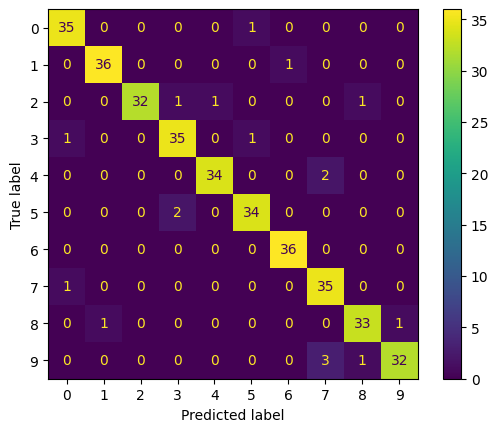

In [62]:
model = MLPClassifier(hidden_layer_sizes = (10,10), max_iter=100)
model.fit(X_train, Y_train)
predicted_labels_test=model.predict(X_test)
CM = ConfusionMatrixDisplay(confusion_matrix(Y_test, predicted_labels_test))
CM.plot()
print(f"Dokładność: {accuracy_score(Y_test, predicted_labels_test):.4f}")
print(f"Precyzja: {precision_score(Y_test, predicted_labels_test, average='weighted') :.4f}")
print(f"Czułość: {recall_score(Y_test, predicted_labels_test, average='weighted'):.4f}")
print(f"Miara F1: {f1_score(Y_test, predicted_labels_test, average='weighted'):.4f}")

Sieć 'na granicy' wynikowej myli cyfrę 8 jak poprzednie ciekawe przypadki sieci.

## Algorytmy uczenia


In [63]:
solvers = ['lbfgs', 'sgd', 'adam']
for s in solvers:
  model = MLPClassifier(hidden_layer_sizes = (10,10), max_iter=2000, solver = s)
  model.fit(X_train, Y_train)
  predicted_labels_test=model.predict(X_test)
  acc = accuracy_score(Y_test,predicted_labels_test)
  f1 = f1_score(Y_test,predicted_labels_test,average='weighted')
  print(f'{s=}: accuracy = {acc:.4f} , F1 = {f1:.4f}')

s='lbfgs': accuracy = 0.9444 , F1 = 0.9447
s='sgd': accuracy = 0.9528 , F1 = 0.9529
s='adam': accuracy = 0.9639 , F1 = 0.9639


## Wnioski
Dla algorytmów uczenia 'sgd' oraz domyślnego algorytmu 'adam', wyniki klasyfikacji są najlepsze. Algorytm 'lbfgs' radzi sobie gorzej. Rozszerzone dane dla niego:

Dokładność: 0.9472
Precyzja: 0.9486
Czułość: 0.9472
Miara F1: 0.9472


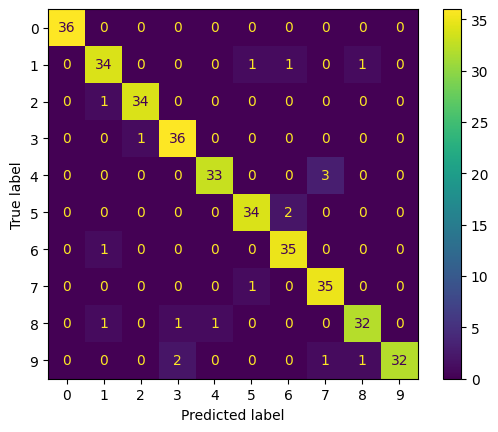

In [64]:
model = MLPClassifier(hidden_layer_sizes = (10,10), max_iter=2000, solver = 'lbfgs')
model.fit(X_train, Y_train)
predicted_labels_test=model.predict(X_test)
CM = ConfusionMatrixDisplay(confusion_matrix(Y_test, predicted_labels_test))
CM.plot()
print(f"Dokładność: {accuracy_score(Y_test, predicted_labels_test):.4f}")
print(f"Precyzja: {precision_score(Y_test, predicted_labels_test, average='weighted') :.4f}")
print(f"Czułość: {recall_score(Y_test, predicted_labels_test, average='weighted'):.4f}")
print(f"Miara F1: {f1_score(Y_test, predicted_labels_test, average='weighted'):.4f}")

Algorytm nie wyróżnia się niczym szczególnym, oprócz omylności przy identyfikacji cyfry 2  w porównaniu do innych przedstawionych sieci.

## Wpływ współczynnika learning_rate przy użyciu agorytmu sgd


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


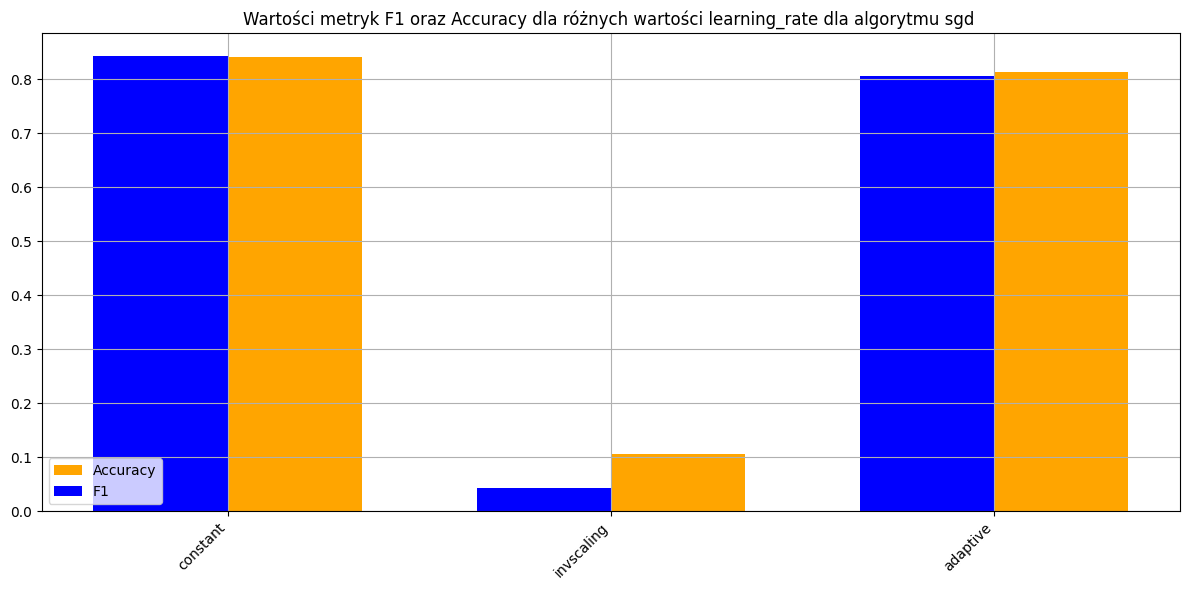

In [65]:
learning_rates = ['constant','invscaling','adaptive']
acc_values = []
f1_values = []

for lr in learning_rates:
    model = MLPClassifier(hidden_layer_sizes=(10, 10), solver='sgd', learning_rate=lr)
    model.fit(X_train, Y_train)
    predicted_labels_test = model.predict(X_test)
    acc_values.append(accuracy_score(Y_test, predicted_labels_test))
    f1_values.append(f1_score(Y_test, predicted_labels_test, average='weighted'))

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
f1_positions = np.arange(len(learning_rates))
acc_positions = f1_positions + bar_width
ax.bar(acc_positions, acc_values, bar_width, label='Accuracy', color='orange')
ax.bar(f1_positions, f1_values, bar_width, label='F1', color='blue')
ax.set_xticks(f1_positions + bar_width / 2)
ax.set_xticklabels(learning_rates, rotation=45, ha='right')
ax.set_title('Wartości metryk F1 oraz Accuracy dla różnych wartości learning_rate dla algorytmu sgd ')
ax.grid()
ax.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

## Wnioski
Dla współczynnika ustawionego na 'invscaling' dostajemy wyjatkowo słaby wynik klasyfikacji. Wynika to z tego, że tak ustawiony parametr powoduje dynamiczne zmniejsznie wartości wag wraz z upływem czasu niezależnie od wyników nauki. Macierz pomyłek dla tak ustawionego współczynnika wygląda następująco:

Dokładność: 0.0944
Precyzja: 0.1407
Czułość: 0.0944
Miara F1: 0.0418


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


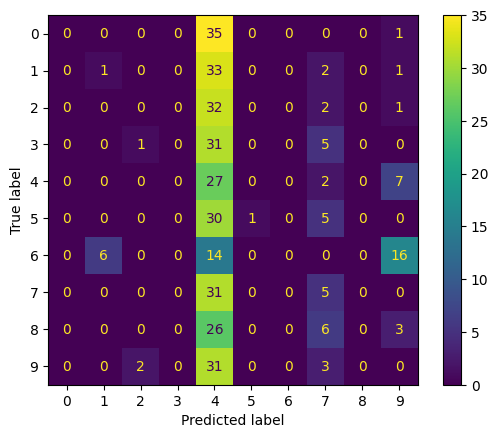

In [66]:
model = MLPClassifier(hidden_layer_sizes=(10, 10), solver='sgd', learning_rate='invscaling')
model.fit(X_train, Y_train)
predicted_labels_test=model.predict(X_test)
CM = ConfusionMatrixDisplay(confusion_matrix(Y_test, predicted_labels_test))
CM.plot()
print(f"Dokładność: {accuracy_score(Y_test, predicted_labels_test):.4f}")
print(f"Precyzja: {precision_score(Y_test, predicted_labels_test, average='weighted') :.4f}")
print(f"Czułość: {recall_score(Y_test, predicted_labels_test, average='weighted'):.4f}")
print(f"Miara F1: {f1_score(Y_test, predicted_labels_test, average='weighted'):.4f}")

Macierz pomyłek potwierdza problemy z uczeniem sieci, o czym świadczy duża liczba błędnych klasyfikacji, wynikających z nieoptymalnego doboru wag.

# ZAD 4
Proszę pobrać zbiór yeast z UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Yeast). Proszę we własnym zakresie dokonać wstępnej analizy i przygotowania tego zbioru. Warto zauważyć, że liczności różnych klas wewnątrz zbioru są bardzo nierówne. Proszę spróbować osiągnąć jak najlepsze wyniki i narysować dla nich macierz pomyłek (dla zbioru uczącego i testującego) oraz wyliczyć wszystkie poznane do tej pory metryki. Czy dokładność na poziomie 0.5 dla takiego zbioru jest dobra? Mogą państwo zbadać też czas wykonywania funkcji fit dla różnych konfiguracji sieci.

In [88]:
url1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data"
data = pd.read_csv(url1, header=None, delimiter=r"\s+")

X = data.iloc[:, 1:-1]
Y = data.iloc[:, -1]
data = pd.concat([X, Y], axis=1)
data

,1,2,3,4,5,6,7,8,9
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


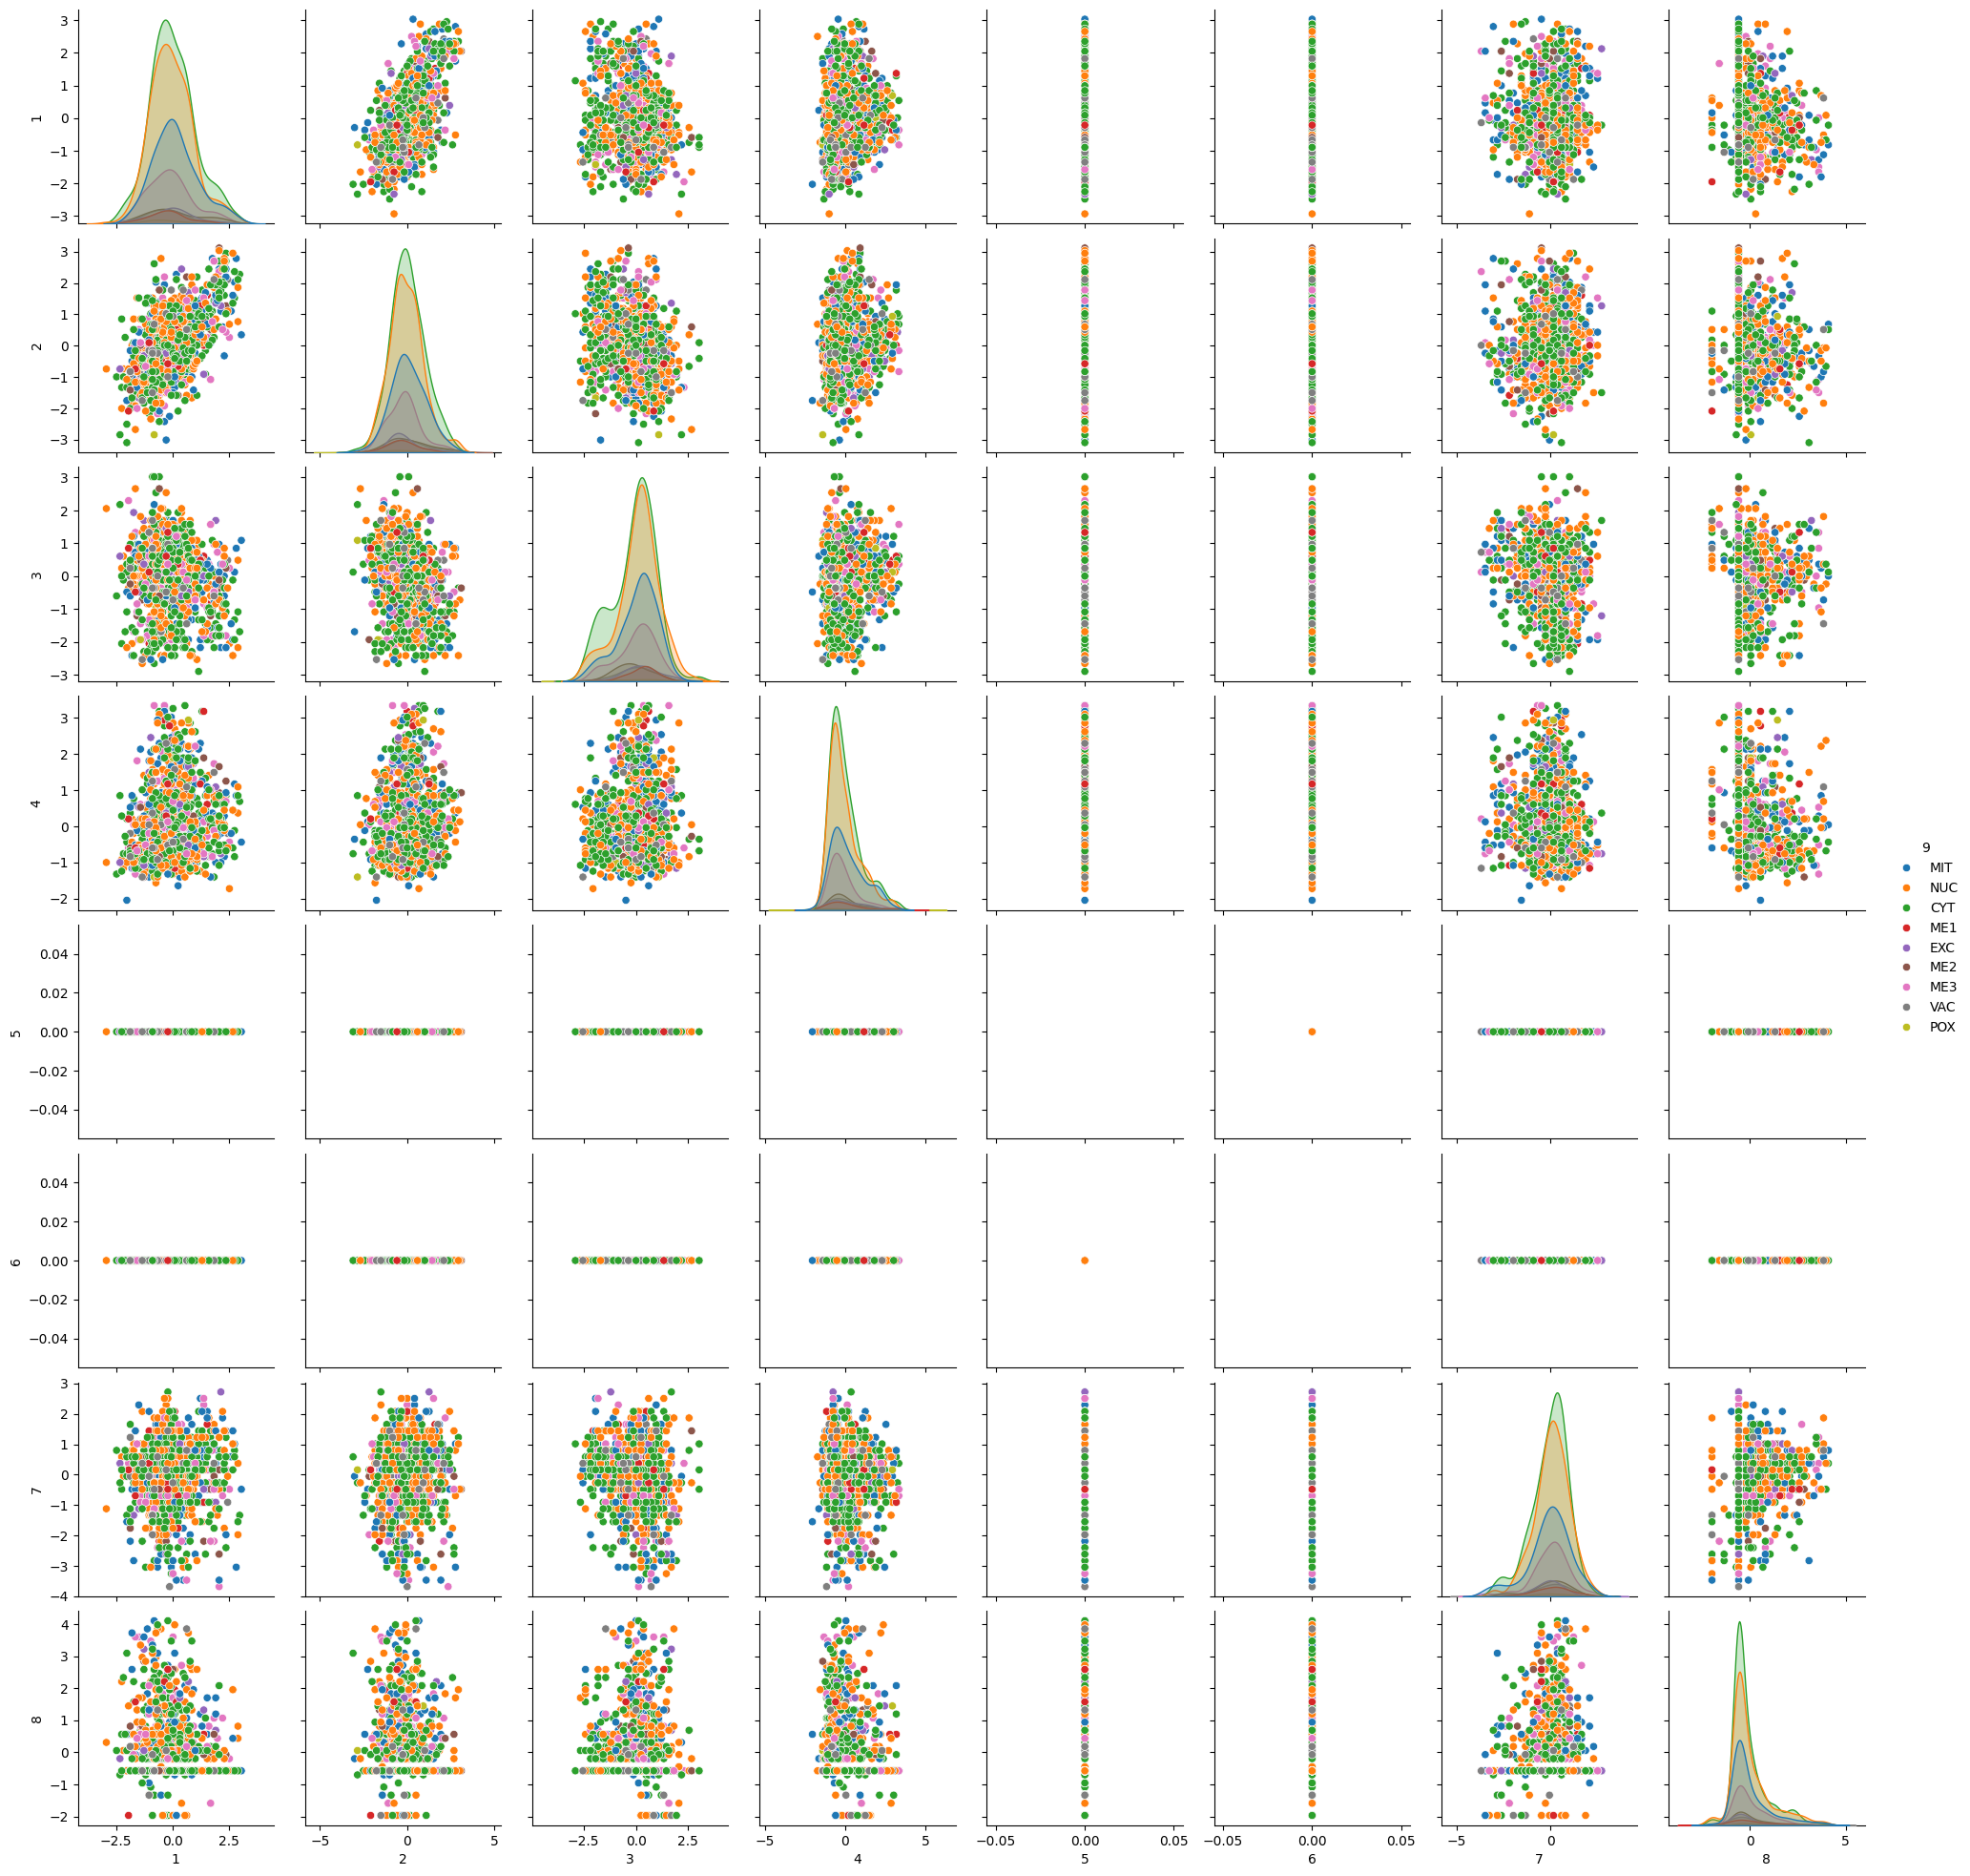

In [107]:
for col in X.columns:
    mean = np.mean(X[col])
    std_dev = np.std(X[col])
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.iloc[:, :-1])
data_scaled = pd.DataFrame(X_scaled, columns=X.columns)
data_scaled = pd.concat([data_scaled, data.iloc[:, -1]], axis=1)

pairplot(data_scaled, hue=data.columns[-1])
plt.show()

In [108]:
data.columns[-1]

np.int64(9)

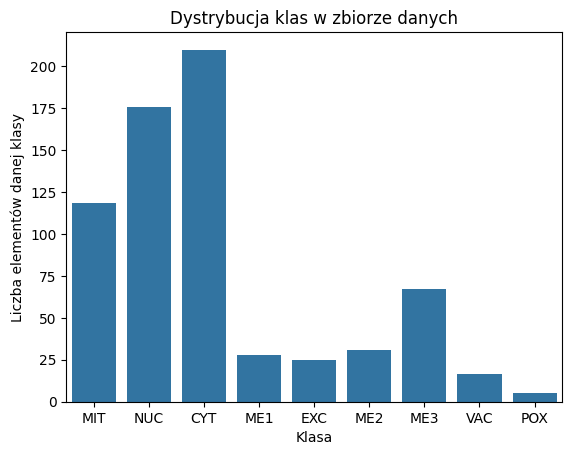

In [109]:
import seaborn as sns
sns.countplot(x=data.iloc[:, -1], data=data)
plt.title('Dystrybucja klas w zbiorze danych')
plt.xlabel('Klasa')
plt.ylabel('Liczba elementów danej klasy')
plt.show()

In [135]:
data_scaled.dropna(inplace=True)
#data_scaled
X_train, X_test, Y_train, Y_test = train_test_split( data_scaled.iloc[:,:-1], data_scaled.iloc[:,-1], test_size=0.2, stratify=data_scaled.iloc[:,-1])

In [139]:
model = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=2000, tol=1e-6)
model.fit(X_train, Y_train)

train_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test, Y_test)
print(f"Train acc: {train_accuracy}")
print(f"Test acc: {test_accuracy}")

predicted_labels_train=model.predict(X_train)
predicted_labels_test=model.predict(X_test)
print(f'Wyliczone metryki dla zbioru testującego: ')
print(f"Dokładność: {accuracy_score(Y_test, predicted_labels_test):.4f}")
print(f"Precyzja: {precision_score(Y_test, predicted_labels_test, average='weighted') :.4f}")
print(f"Czułość: {recall_score(Y_test, predicted_labels_test, average='weighted'):.4f}")
print(f"Miara F1: {f1_score(Y_test, predicted_labels_test, average='weighted'):.4f}")

Train acc: 0.9909729187562688
Test acc: 0.244
Wyliczone metryki dla zbioru testującego: 
Dokładność: 0.2440
Precyzja: 0.2197
Czułość: 0.2440
Miara F1: 0.2300


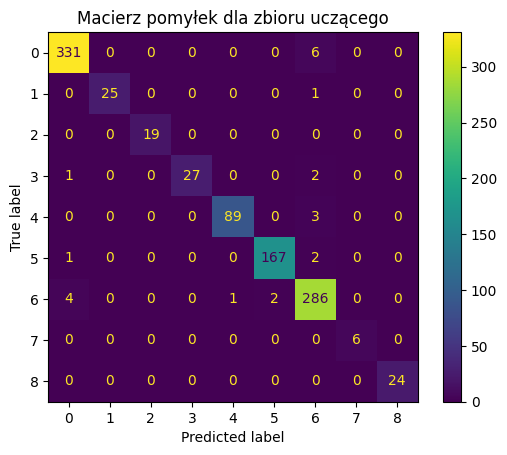

In [137]:
CM_train = ConfusionMatrixDisplay(confusion_matrix(Y_train, predicted_labels_train))
CM_train.plot()
CM_train.ax_.set_title("Macierz pomyłek dla zbioru uczącego")
plt.show()

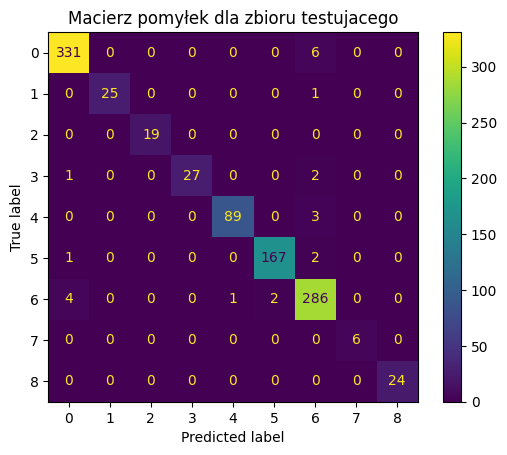

In [138]:
CM_test = ConfusionMatrixDisplay(confusion_matrix(Y_test, predicted_labels_test))
CM_train.plot()
CM_train.ax_.set_title("Macierz pomyłek dla zbioru testujacego")
plt.show()

## Wnioski
Wyniki klasyfikacji dla zbioru 'yeast' są niezadowalające. Niska skuteczność modelu wynika najprawdopodobniej z nierównomiernej dystrybucji klas oraz ich znaczącego nakładania się, co utrudnia efektywne odseparowanie. W związku z tym, uważam, że osiągnięcie wyniku powyżej 50% dla każdej z metryk można uznać za sukces. Pomimo zastosowania różnych konfiguracji sieci neuronowej, nie udało mi się uzyskać takiej dokładności klasyfikacji.

In [140]:
!jupyter nbconvert --to html "/content/drive/My Drive/Colab Notebooks/Lab02/lab02.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/Lab02/lab02.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 23 image(s).
[NbConvertApp] Writing 3635113 bytes to /content/drive/My Drive/Colab Notebooks/Lab02/lab02.html
